## Project No3 - Markov Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Problem 1b

In [4]:
def oneStep(s):
    if s == 1:
        p1 = 0.2
        p2 = 0.7
        p3 = 0.1
    elif s == 2:
        p1 = 0.2
        p2 = 0.5
        p3 = 0.3
    else:
        p1 = 0.2
        p2 = 0.4
        p3 = 0.4
    
    roll = np.random.multinomial(1, [p1,p2,p3])
    roll_val = 1
    if roll[1] == 1:
        roll_val = 2
    elif roll[2] == 1:
        roll_val = 3
    return roll_val
    

In [10]:
np.random.seed(201)
state = 1
n = 100
chain = np.zeros(n)
chain[0] = state
for i in range(n):
    chain[i] = state
    state = oneStep(state)

print(chain)

[1. 2. 3. 3. 3. 3. 3. 2. 3. 1. 1. 2. 2. 1. 2. 3. 2. 2. 1. 2. 2. 3. 3. 2.
 3. 2. 1. 2. 1. 2. 1. 2. 1. 2. 3. 1. 2. 2. 2. 1. 2. 3. 1. 2. 2. 2. 2. 2.
 2. 3. 1. 2. 2. 1. 2. 3. 2. 2. 3. 3. 2. 2. 2. 2. 2. 2. 3. 2. 3. 3. 2. 1.
 2. 1. 3. 2. 3. 2. 1. 2. 1. 2. 2. 3. 1. 1. 2. 1. 1. 2. 1. 2. 3. 2. 2. 2.
 3. 2. 1. 3.]


The above sequence of 1's, 2's, and 3's represents a sequence of 100 steps from the defined Markov Chain starting at state 1

### Problem 2b

In [39]:
p_mat = np.matrix([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])
pi_inf = [0.2, 0.51111111, 0.28888889]
pi_curr = [0.33, 0.33, 0.34]
p_curr = p_mat
n = 10
errors = np.zeros(n + 1)
errors[0] = np.linalg.norm(np.subtract(pi_curr, pi_inf))

for i in range(n):
    i = i+1
    if i == 1:
        p_curr = p_mat
    else:
        p_curr = np.matmul(p_curr, p_mat)
    
    pi_curr = np.matmul(pi_curr, p_curr)
    errors[i] = np.linalg.norm(np.subtract(pi_curr, pi_inf))
    

Text(0, 0.5, 'L2 norm of Pi_i - Pi_stationary')

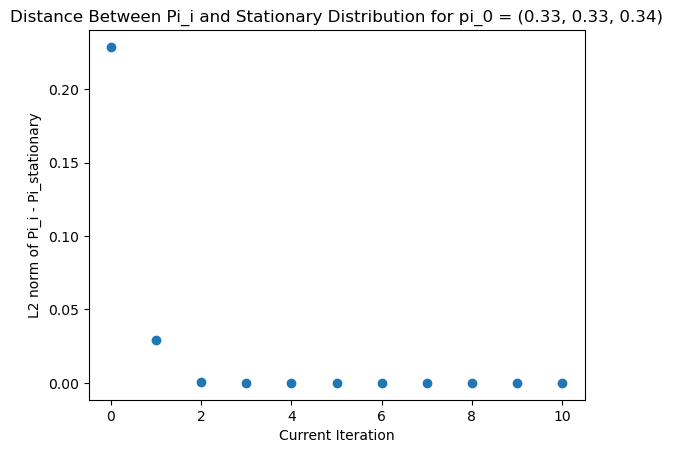

In [40]:
i_vals = range(n+1)
plt.scatter(i_vals, errors)
plt.title('Distance Between Pi_i and Stationary Distribution for pi_0 = (0.33, 0.33, 0.34)')
plt.xlabel('Current Iteration')
plt.ylabel('L2 norm of Pi_i - Pi_stationary')

In [41]:
pi_curr

matrix([[0.2       , 0.51111111, 0.28888889]])

In [44]:
p_mat = np.matrix([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])
pi_inf = [0.2, 0.51111111, 0.28888889]
pi_curr = [0.9, 0.05, 0.05]
p_curr = p_mat
n = 10
errors = np.zeros(n + 1)
errors[0] = np.linalg.norm(np.subtract(pi_curr, pi_inf))

for i in range(n):
    i = i+1
    if i == 1:
        p_curr = p_mat
    else:
        p_curr = np.matmul(p_curr, p_mat)
    
    pi_curr = np.matmul(pi_curr, p_curr)
    errors[i] = np.linalg.norm(np.subtract(pi_curr, pi_inf))

Text(0, 0.5, 'L2 norm of Pi_i - Pi_stationary')

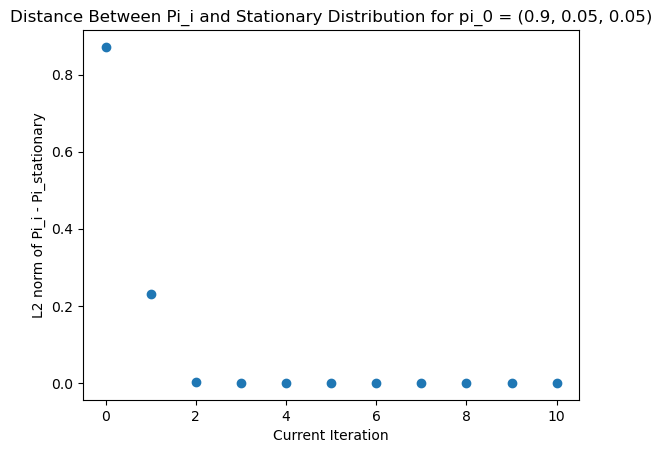

In [45]:
i_vals = range(n+1)
plt.scatter(i_vals, errors)
plt.title('Distance Between Pi_i and Stationary Distribution for pi_0 = (0.9, 0.05, 0.05)')
plt.xlabel('Current Iteration')
plt.ylabel('L2 norm of Pi_i - Pi_stationary')

In [46]:
pi_curr

matrix([[0.2       , 0.51111111, 0.28888889]])

Observe that after only 10 iterations the value of our probability distribution is almost indistinguishable from that of our stationary distribution. Despite having two very different initial probability distributions, the error between our current and stationary distribution decreases very quickly towards 0 after only 2 or 3 steps. The probability distribution converges very quickly irregardless of the starting distribution if that starting distribution is non-trivial.  

### Problem 3a

In [51]:
def absorbTime(s, num_steps = 0):
    if s == 1:
        p1 = 0.2
        p2 = 0.7
        p3 = 0.1
    elif s == 2:
        p1 = 0.2
        p2 = 0.5
        p3 = 0.3
    else:
        return num_steps
    
    roll = np.random.multinomial(1, [p1,p2,p3])
    roll_val = 1
    if roll[1] == 1:
        roll_val = 2
    elif roll[2] == 1:
        roll_val = 3
    return absorbTime(roll_val, num_steps + 1)


4

In [52]:
num_trials = 100000
from_one = np.zeros(num_trials)
from_two = np.zeros(num_trials)

np.random.seed(201)
for i in range(num_trials):
    from_one[i] = absorbTime(1)
    from_two[i] = absorbTime(2)
    

Text(0, 0.5, 'Count of Trials with Given Absorption Time')

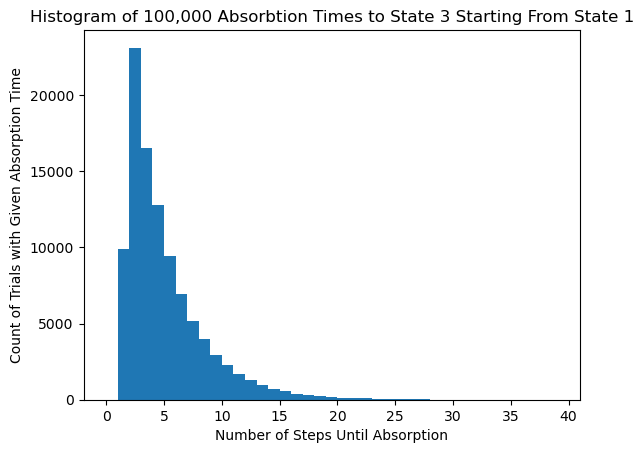

In [62]:
bin_seq = range(int(max(from_one)) + 1)
plt.hist(from_one, bins = bin_seq)
plt.title('Histogram of 100,000 Absorbtion Times to State 3 Starting From State 1')
plt.xlabel('Number of Steps Until Absorption')
plt.ylabel('Count of Trials with Given Absorption Time')

In [60]:
np.mean(from_one)

4.59509

The average number of steps until reaching state 3 starting from state 1 is 4.59 from our 100,000 trials. 

Text(0, 0.5, 'Count of Trials with Given Absorption Time')

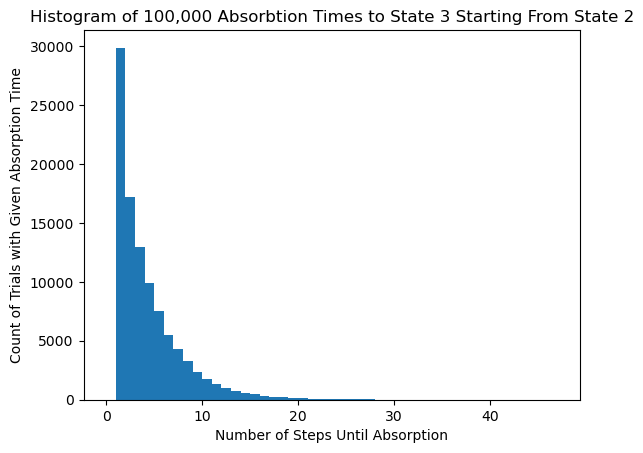

In [63]:
bin_seq = range(int(max(from_two)) + 1)
plt.hist(from_two, bins = bin_seq)
plt.title('Histogram of 100,000 Absorbtion Times to State 3 Starting From State 2')
plt.xlabel('Number of Steps Until Absorption')
plt.ylabel('Count of Trials with Given Absorption Time')

In [64]:
np.mean(from_two)

3.84665

The average number of steps until reaching state 3 starting from state 2 is 3.846 from our 100,000 trials. 